In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="Workbook contains no default style")

file_path = "./data/2020혼인지표.xlsx"
df = pd.read_excel(file_path, skiprows=3)

df['구분'] = df['Unnamed: 0']  # '구분' 열 생성
df['상태'] = df['Unnamed: 1']  # '상태' 열 생성

df['구분'] = df['구분'].ffill() # 우선 위에서 아래로 채우기
first_male_idx   = df[df['구분'] == '남자'].index[0]          # '남자' 위치 찾기
first_female_idx = df[df['구분'] == '여자'].index[0]          # '여자' 위치 찾기

df.loc[:first_male_idx - 1, '구분'] = '전체'                  # '전체'로 채우기
df.loc[first_male_idx:first_female_idx - 1, '구분'] = '남자'  # '남자'로 채우기
df.loc[first_female_idx:, '구분'] = '여자'                    # '여자'로 채우기

order = ['전체', '남자', '여자']
df['구분'] = pd.Categorical(df['구분'], categories=order, ordered=True)

marriage = df.pivot_table(
    index=['구분', '상태'], 
    values=['20~24세', '25~29세', '30~34세', '35~39세'], 
    aggfunc='first',
    observed=False
)

marriage


20~24세  25~29세  30~34세  35~39세
구분 상태                                 
전체 미혼     98.6    87.4    56.4    30.7
   사별      0.0     0.1     0.1     0.3
   유배우     1.2    12.0    42.0    65.8
   이혼      0.1     0.6     1.5     3.2
   합계    100.0   100.0   100.0   100.0
남자 미혼     99.2    92.2    65.9    37.8
   사별      0.1     0.2     0.2     0.2
   유배우     0.7     7.2    32.9    59.6
   이혼      0.1     0.4     1.0     2.4
   합계    100.0   100.0   100.0   100.0
여자 미혼     98.0    82.0    46.0    23.3
   사별      0.0     0.0     0.1     0.3
   유배우     1.9    17.3    51.8    72.3
   이혼      0.1     0.7     2.0     4.0
   합계    100.0   100.0   100.0   100.0

In [159]:
import matplotlib.pyplot as plt
import koreanize_matplotlib 
%matplotlib inline

merriage_pie = (marriage
    .query("구분 == '전체'")  # exclude 'sex', include only 'all'
    .groupby('상태')[['20~24세', '25~29세', '30~34세', '35~39세']].sum()# group by '상태'
    .rename(index={'유배우': '기혼', '사별': '기타', '이혼': '기타'}) #'유배우'2기혼,(사별,이혼)2기타
    .drop('합계')  # exclude 'all' on pie chart 
    .groupby(level=0).sum()  # Merge '기타' and sum
)

merriage_pie


,20~24세,25~29세,30~34세,35~39세
상태,,,,
기타,0.1,0.7,1.6,3.5
기혼,1.2,12.0,42.0,65.8
미혼,98.6,87.4,56.4,30.7


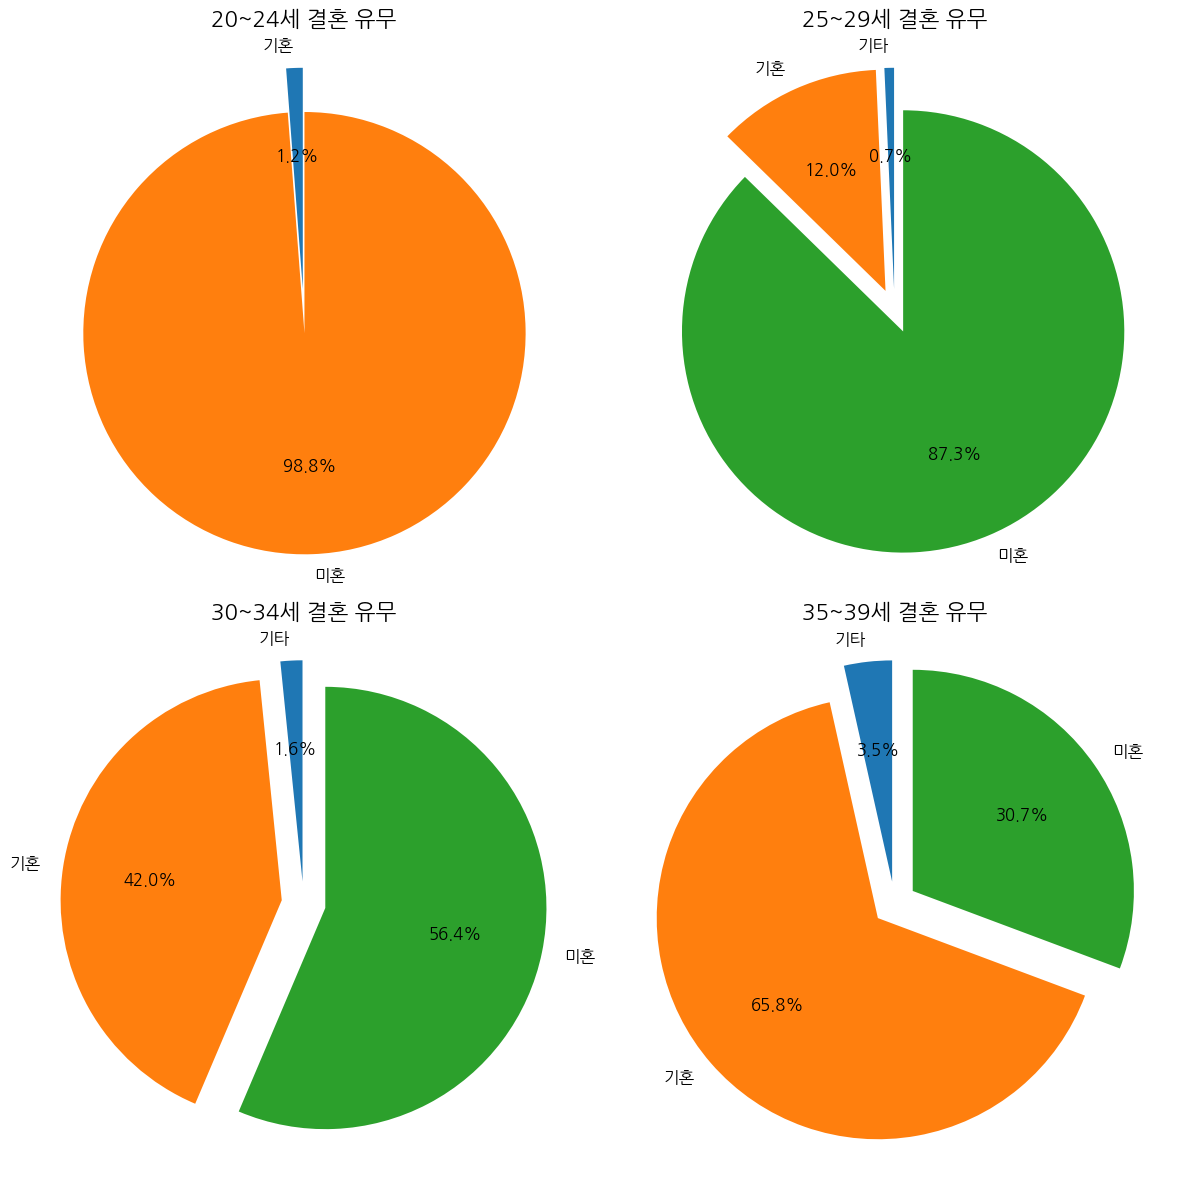

In [181]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

def plot_pie_chart(ax, data, title, fontsize=16, text_fontsize=12):
    # 0.5% 미만의 항목 제거
    data_filtered = data[data >= 0.5]  # 0.5% 미만 항목 제거

    # '기타' 항목이 있을 경우 포함
    if '기타' in data_filtered.index:
        small_values = data_filtered[data_filtered < 0.05]
        if len(small_values) > 0:
            data_filtered = data_filtered[data_filtered >= 0.05]
            data_filtered['기타'] = small_values.sum()

    num_slices = len(data_filtered)
    explode = [0.1] * num_slices  # '기타' 항목도 폭발 효과를 주면 강조할 수 있습니다.
    data_filtered.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax,
                           labels=data_filtered.index,
                           textprops={'fontsize': text_fontsize},
                           startangle=90
                          )
    ax.set_title(title, fontsize=fontsize)
    ax.set_ylabel('')

# Pie chart for each marital status distribution
plot_pie_chart(ax[0, 0], merriage_pie['20~24세'], '20~24세 결혼 유무')
plot_pie_chart(ax[0, 1], merriage_pie['25~29세'], '25~29세 결혼 유무')
plot_pie_chart(ax[1, 0], merriage_pie['30~34세'], '30~34세 결혼 유무')
plot_pie_chart(ax[1, 1], merriage_pie['35~39세'], '35~39세 결혼 유무')

plt.tight_layout()
plt.show()




